In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from tqdm import tqdm
from sympy import Symbol
import centrex_TlF as centrex
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from utils.plot_utils import set_fontsize

In [37]:
QN_X = centrex.states.generate_coupled_states_ground([0,1,2])
QN_B = centrex.states.generate_coupled_states_excited([1,2,3,4], Ps = [1,-1])

In [38]:
centrex.hamiltonian.utils.threej_f.cache_info()

CacheInfo(hits=1, misses=3, maxsize=1000000, currsize=3)

In [39]:
centrex.states.utils.CGc.cache_info()

CacheInfo(hits=508032, misses=592, maxsize=1000000, currsize=592)

In [40]:
%%time
QN, H = centrex.transitions.calculate_energies(QN_X, QN_B)

Wall time: 20.9 s


In [41]:
centrex.states.utils.CGc.cache_info()

CacheInfo(hits=866800, misses=592, maxsize=1000000, currsize=592)

In [42]:
centrex.hamiltonian.utils.threej_f.cache_info()

CacheInfo(hits=1, misses=3, maxsize=1000000, currsize=3)

In [67]:
R0_X = 1*centrex.CoupledBasisState(J=0, F1 = 1/2, F = 1, mF = 0, 
                        I1 =1/2, I2 = 1/2, electronic_state='X', P = +1, Omega = 0)
R0_B = 1*centrex.CoupledBasisState(J=1, F1 = 3/2, F = 2, mF = 0, I1 =1/2, 
                            I2 = 1/2, electronic_state='B', P = -1, Omega = 1)
freq = centrex.transitions.calculate_transition_frequency(R0_X, R0_B, H, QN)

print(f'freq = {freq/(4e9):.2f} GHz')

freq = 275851.99 GHz


In [68]:
R1_X = 1*centrex.CoupledBasisState(J=1, F1 = 3/2, F = 2, mF = 0, I1 =1/2, I2 = 1/2, electronic_state='X', P = -1, Omega = 0)
R1_B = 1*centrex.CoupledBasisState(J=2, F1 = 5/2, F = 3, mF = 0, I1 =1/2, I2 = 1/2, electronic_state='B', P = +1, Omega = 1)

freq = centrex.transitions.calculate_transition_frequency(R1_X, R1_B, H, QN)

print(f'freq = {freq/(4e9):.5f} GHz')

freq = 275855.38134 GHz


In [69]:
%%time
R0_X = 1*centrex.CoupledBasisState(J=0, F1 = 1/2, F = 1, mF = 0, 
                        I1 =1/2, I2 = 1/2, electronic_state='X', P = +1, Omega = 0)
R0_B = 1*centrex.CoupledBasisState(J=1, F1 = 3/2, F = 2, mF = 0, I1 =1/2, 
                            I2 = 1/2, electronic_state='B', P = -1, Omega = 1)
freq = centrex.transitions.generate_transition_frequency(R0_X, R0_B)

print(f'freq = {freq/(4e9):.2f} GHz')

freq = 275851.99 GHz
Wall time: 185 ms


In [70]:
R1_X = 1*centrex.CoupledBasisState(J=1, F1 = 3/2, F = 2, mF = 0, I1 =1/2, I2 = 1/2, electronic_state='X', P = -1, Omega = 0)
R1_B = 1*centrex.CoupledBasisState(J=2, F1 = 5/2, F = 3, mF = 0, I1 =1/2, I2 = 1/2, electronic_state='B', P = +1, Omega = 1)

freq = centrex.transitions.generate_transition_frequency(R1_X, R1_B)

print(f'freq = {freq/(4e9):.5f} GHz')

freq = 275855.38134 GHz


In [71]:
Js = [1,2,3,4,5]
I1 = 1/2
I2 = 1/2
#Generate all excited states
B_states = []
for J in tqdm(Js):
    for F1 in np.arange(J-I1, J+I1+1):
        for F in np.arange(F1-I1, F1+I1+1):
            state = 1*centrex.CoupledBasisState(J=J, F1 = F1, F = F, mF = 0, I1 =I1, I2 = I2, electronic_state='B', 
                                        P = (-1)**(J+1), Omega = 1)
            B_states.append(state)

#Generate ground states(only one for each J since they are almost degenerate)
X_states = []
for J in tqdm(Js):
    F1 = J+1/2
    F = J
    state = 1*centrex.CoupledBasisState(J=J, F1 = F1, F = F, mF = 0, I1 =I1, I2 = I2, electronic_state='X', 
                                P = (-1)**J, Omega = 0)
    X_states.append(state)

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5021.92it/s]


In [72]:
%%time
#Calculate transition frequencies for each J for X and each hyperfine state for B
Q_transitions = []
Q_frequencies = []
Js = [1,2,3,4]

states = []

for J in Js:
    print(10*'*')
    #Determine X-state
    F1_X = J+1/2
    F_X = J
    X_state = 1*centrex.CoupledBasisState(J=J, F1 = F1_X, F = F_X, mF = 0, I1 =I1, I2 = I2, electronic_state='X', 
                                P = (-1)**J, Omega = 0)
    
    #Determine B-states
    for F1 in np.arange(J-I1, J+I1+1):
        for F in np.arange(F1-I1, F1+I1+1):
            B_state = 1*centrex.CoupledBasisState(J=J, F1 = F1, F = F, mF = 0, I1 = I1, I2 = I2, electronic_state='B', 
                                        P = (-1)**(J+1), Omega = 1)
            
            #Calculate transition frequency
#             print(X_state.__hash__(), B_state.__hash__())
            frq = centrex.transitions.generate_transition_frequency(X_state, B_state)/(4e9) #In GHz at IR
            
            #Print
            print(f"Frequency for Q{J} F1' = {F1}, F' = {F} is f = {frq}  GHz")
            Q_transitions.append(f"Q{J} F1' = {F1}, F' = {F}")
            Q_frequencies.append(frq)
            states.append([X_state, B_state])

**********
Frequency for Q1 F1' = 0.5, F' = 0.0 is f = 275845.0569554738  GHz
Frequency for Q1 F1' = 0.5, F' = 1.0 is f = 275845.1978750253  GHz
Frequency for Q1 F1' = 1.5, F' = 1.0 is f = 275848.5815390877  GHz
Frequency for Q1 F1' = 1.5, F' = 2.0 is f = 275848.66081384313  GHz
**********
Frequency for Q2 F1' = 1.5, F' = 1.0 is f = 275848.8268764944  GHz
Frequency for Q2 F1' = 1.5, F' = 2.0 is f = 275848.9723437773  GHz
Frequency for Q2 F1' = 2.5, F' = 2.0 is f = 275848.6601503365  GHz
Frequency for Q2 F1' = 2.5, F' = 3.0 is f = 275848.71752872004  GHz
**********
Frequency for Q3 F1' = 2.5, F' = 2.0 is f = 275848.8534321063  GHz
Frequency for Q3 F1' = 2.5, F' = 3.0 is f = 275848.93954292947  GHz
Frequency for Q3 F1' = 3.5, F' = 3.0 is f = 275848.7189256944  GHz
Frequency for Q3 F1' = 3.5, F' = 4.0 is f = 275848.7639436567  GHz
**********
Frequency for Q4 F1' = 3.5, F' = 3.0 is f = 275848.8854332833  GHz
Frequency for Q4 F1' = 3.5, F' = 4.0 is f = 275848.9465009204  GHz
Frequency for Q

In [73]:
%%time
R_transitions = []
R_frequencies = []

#Calculate transition frequencies for each J for X and each hyperfine state for B
Js = [0,1,2,3,4]
for J_X in Js:
    print(10*'*')
    #Determine X-state
    F1_X = J_X+1/2
    F_X = J_X
    X_state = 1*centrex.CoupledBasisState(J=J_X, F1 = F1_X, F = F_X, mF = 0, I1 =I1, I2 = I2, electronic_state='X', 
                                P = (-1)**J_X, Omega = 0)
    
    #Determine B-states
    J_B = J_X+1
    for F1 in np.arange(J_B-I1, J_B+I1+1):
        for F in np.arange(F1-I2, F1+I2+1):
            B_state = 1*centrex.CoupledBasisState(J=J_B, F1 = F1, F = F, mF = 0, I1 = I1, I2 = I2, electronic_state='B', 
                                        P = (-1)**(J_X+1), Omega = 1)
            
            #Calculate transition frequency
            frq = centrex.transitions.generate_transition_frequency(X_state, B_state)/(4e9) #In GHz at IR
            
            #Print
            print(X_state.find_largest_component())
            print(B_state.find_largest_component())
            print(f"Frequency for R{J_X} F1' = {F1}, F' = {F} is f = {frq}  GHz")
            
            R_transitions.append(f"R{J_X} F1' = {F1}, F' = {F}")
            R_frequencies.append(frq)

**********
|X, J = 0, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>
|B, J = 1, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
Frequency for R0 F1' = 0.5, F' = 0.0 is f = 275848.39463601663  GHz
|X, J = 0, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>
|B, J = 1, F₁ = 1/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
Frequency for R0 F1' = 0.5, F' = 1.0 is f = 275848.5355484006  GHz
|X, J = 0, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>
|B, J = 1, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
Frequency for R0 F1' = 1.5, F' = 1.0 is f = 275851.91078944906  GHz
|X, J = 0, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>
|B, J = 1, F₁ = 3/2, F = 2, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
Frequency for R0 F1' = 1.5, F' = 2.0 is f = 275851.98999667517  GHz
**********
|X, J = 1, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
|B, J = 2, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 1>
Frequen

In [16]:
P_transitions = []
P_frequencies = []

#Calculate transition frequencies for each J for X and each hyperfine state for B
Js = [2,3,4,5]
for J_X in Js:
    print(10*'*')
    #Determine X-state
    F1_X = J_X+1/2
    F_X = J_X
    X_state = 1*centrex.CoupledBasisState(J=J_X, F1 = F1_X, F = F_X, mF = 0, I1 =I1, I2 = I2, electronic_state='X', 
                                P = (-1)**J_X, Omega = 0)
    
    #Determine B-states
    J_B = J_X-1
    for F1 in np.arange(J_B-I1, J_B+I1+1):
        for F in np.arange(F1-I2, F1+I2+1):
            B_state = 1*centrex.CoupledBasisState(J=J_B, F1 = F1, F = F, mF = 0, I1 = I1, I2 = I2, electronic_state='B', 
                                        P = (-1)**(J_X+1), Omega = 1)
            
            #Calculate transition frequency
            frq = centrex.transitions.generate_transition_frequency(X_state, B_state)/(2*np.pi*4e9) #In GHz at IR
            
            #Print
            print(f"Frequency for P{J_X} F1' = {F1}, F' = {F} is f = {frq}  GHz")
            
            P_transitions.append(f"P{J_X} F1' = {F1}, F' = {F}")
            P_frequencies.append(frq)

**********
Frequency for P2 F1' = 0.5, F' = 0.0 is f = 43901.04383847712  GHz
Frequency for P2 F1' = 0.5, F' = 1.0 is f = 43901.06626537957  GHz
Frequency for P2 F1' = 1.5, F' = 1.0 is f = 43901.60345167656  GHz
Frequency for P2 F1' = 1.5, F' = 2.0 is f = 43901.61605789813  GHz
**********
Frequency for P3 F1' = 1.5, F' = 1.0 is f = 43901.11320232069  GHz
Frequency for P3 F1' = 1.5, F' = 2.0 is f = 43901.136343827  GHz
Frequency for P3 F1' = 2.5, F' = 2.0 is f = 43901.08554482068  GHz
Frequency for P3 F1' = 2.5, F' = 3.0 is f = 43901.094668405705  GHz
**********
Frequency for P4 F1' = 2.5, F' = 2.0 is f = 43900.58764826349  GHz
Frequency for P4 F1' = 2.5, F' = 3.0 is f = 43900.601344960996  GHz
Frequency for P4 F1' = 3.5, F' = 3.0 is f = 43900.564681051095  GHz
Frequency for P4 F1' = 3.5, F' = 4.0 is f = 43900.571839179844  GHz
**********
Frequency for P5 F1' = 3.5, F' = 3.0 is f = 43900.06316072085  GHz
Frequency for P5 F1' = 3.5, F' = 4.0 is f = 43900.072873352015  GHz
Frequency for P

In [74]:
S_transitions = []
S_frequencies = []

#Calculate transition frequencies for each J for X and each hyperfine state for B
Js = [0,1,2,3]
for J_X in Js:
    print(10*'*')
    #Determine X-state
    F1_X = J_X+1/2
    F_X = J_X
    X_state = 1*centrex.CoupledBasisState(J=J_X, F1 = F1_X, F = F_X, mF = 0, I1 =I1, I2 = I2, electronic_state='X', 
                                P = (-1)**J_X, Omega = 0)
    
    #Determine B-states
    J_B = J_X+2
    for F1 in np.arange(J_B-I1, J_B+I1+1):
        for F in np.arange(F1-I2, F1+I2+1):
            B_state = 1*centrex.CoupledBasisState(J=J_B, F1 = F1, F = F, mF = 0, I1 = I1, I2 = I2, electronic_state='B', 
                                        P = (-1)**(J_X+1), Omega = 1)
            
            #Calculate transition frequency
            frq = centrex.transitions.generate_transition_frequency(X_state, B_state)/(4e9) #In GHz at IR
            
            #Print
            print(f"Frequency for S{J_X} F1' = {F1}, F' = {F} is f = {frq} GHz")
            S_transitions.append(f"S{J_X} F1' = {F1}, F' = {F}")
            S_frequencies.append(frq)

**********
Frequency for S0 F1' = 1.5, F' = 1.0 is f = 275858.82789674465 GHz
Frequency for S0 F1' = 1.5, F' = 2.0 is f = 275858.97336402757 GHz
Frequency for S0 F1' = 2.5, F' = 2.0 is f = 275858.66117058677 GHz
Frequency for S0 F1' = 2.5, F' = 3.0 is f = 275858.7185489703 GHz
**********
Frequency for S1 F1' = 2.5, F' = 2.0 is f = 275865.52178530983 GHz
Frequency for S1 F1' = 2.5, F' = 3.0 is f = 275865.607896133 GHz
Frequency for S1 F1' = 3.5, F' = 3.0 is f = 275865.38727889786 GHz
Frequency for S1 F1' = 3.5, F' = 4.0 is f = 275865.4322968602 GHz
**********
Frequency for S2 F1' = 3.5, F' = 3.0 is f = 275872.2211178295 GHz
Frequency for S2 F1' = 3.5, F' = 4.0 is f = 275872.28218546655 GHz
Frequency for S2 F1' = 4.5, F' = 4.0 is f = 275872.1106690212 GHz
Frequency for S2 F1' = 4.5, F' = 5.0 is f = 275872.1477074942 GHz
**********
Frequency for S3 F1' = 4.5, F' = 4.0 is f = 275878.9306491665 GHz
Frequency for S3 F1' = 4.5, F' = 5.0 is f = 275878.9779288055 GHz
Frequency for S3 F1' = 5.5,

In [75]:
O_transitions = []
O_frequencies = []

#Calculate transition frequencies for each J for X and each hyperfine state for B
Js = [3,4,5,6]
for J_X in Js:
    print(10*'*')
    #Determine X-state
    F1_X = J_X+1/2
    F_X = J_X
    X_state = 1*centrex.CoupledBasisState(J=J_X, F1 = F1_X, F = F_X, mF = 0, I1 =I1, I2 = I2, electronic_state='X', 
                                P = (-1)**J_X, Omega = 0)
    
    #Determine B-states
    J_B = J_X-2
    for F1 in np.arange(J_B-I1, J_B+I1+1):
        for F in np.arange(F1-I2, F1+I2+1):
            B_state = 1*centrex.CoupledBasisState(J=J_B, F1 = F1, F = F, mF = 0, I1 = I1, I2 = I2, electronic_state='B', 
                                        P = (-1)**(J_X+1), Omega = 1)
            
            #Calculate transition frequency
            frq = centrex.transitions.generate_transition_frequency(X_state, B_state)/(4e9) #In GHz at IR
            
            #Print
            print(f"Frequency for O{J_X} F1' = {F1}, F' = {F} is f = {frq} GHz")
            O_transitions.append(f"S{J_X} F1' = {F1}, F' = {F}")
            O_frequencies.append(frq)

**********
Frequency for O3 F1' = 0.5, F' = 0.0 is f = 275828.38860227034 GHz
Frequency for O3 F1' = 0.5, F' = 1.0 is f = 275828.5295218218 GHz
Frequency for O3 F1' = 1.5, F' = 1.0 is f = 275831.91318588424 GHz
Frequency for O3 F1' = 1.5, F' = 2.0 is f = 275831.9924606397 GHz
**********
Frequency for O4 F1' = 1.5, F' = 1.0 is f = 275825.49119194824 GHz
Frequency for O4 F1' = 1.5, F' = 2.0 is f = 275825.63665923115 GHz
Frequency for O4 F1' = 2.5, F' = 2.0 is f = 275825.3244657903 GHz
Frequency for O4 F1' = 2.5, F' = 3.0 is f = 275825.3818441739 GHz
**********
Frequency for O5 F1' = 2.5, F' = 2.0 is f = 275818.8504165209 GHz
Frequency for O5 F1' = 2.5, F' = 3.0 is f = 275818.936527344 GHz
Frequency for O5 F1' = 3.5, F' = 3.0 is f = 275818.71591010893 GHz
Frequency for O5 F1' = 3.5, F' = 4.0 is f = 275818.7609280713 GHz
**********
Frequency for O6 F1' = 3.5, F' = 3.0 is f = 275812.215086755 GHz
Frequency for O6 F1' = 3.5, F' = 4.0 is f = 275812.2761543921 GHz
Frequency for O6 F1' = 4.5, F

In [76]:
T_transitions = []
T_frequencies = []

#Calculate transition frequencies for each J for X and each hyperfine state for B
Js = [0,1,2]
for J_X in Js:
    print(10*'*')
    #Determine X-state
    F1_X = J_X+1/2
    F_X = J_X
    X_state = 1*centrex.CoupledBasisState(J=J_X, F1 = F1_X, F = F_X, mF = 0, I1 =I1, I2 = I2, electronic_state='X', 
                                P = (-1)**J_X, Omega = 0)
    
    #Determine B-states
    J_B = J_X+3
    for F1 in np.arange(J_B-I1, J_B+I1+1):
        for F in np.arange(F1-I2, F1+I2+1):
            B_state = 1*centrex.CoupledBasisState(J=J_B, F1 = F1, F = F, mF = 0, I1 = I1, I2 = I2, electronic_state='B', 
                                        P = (-1)**(J_X+1), Omega = 1)
            
            #Calculate transition frequency
            frq = centrex.transitions.generate_transition_frequency(X_state, B_state)/(4e9) #In GHz at IR
            #Print
            print(f"Frequency for T{J_X} F1' = {F1}, F' = {F} is f = {frq} GHz")
            T_transitions.append(f"T{J_X} F1' = {F1}, F' = {F}")
            T_frequencies.append(frq)

**********
Frequency for T0 F1' = 2.5, F' = 2.0 is f = 275868.86399291526 GHz
Frequency for T0 F1' = 2.5, F' = 3.0 is f = 275868.9500518038 GHz
Frequency for T0 F1' = 3.5, F' = 3.0 is f = 275868.71968566376 GHz
Frequency for T0 F1' = 3.5, F' = 4.0 is f = 275868.76466151315 GHz
**********
Frequency for T1 F1' = 3.5, F' = 3.0 is f = 275878.90320448607 GHz
Frequency for T1 F1' = 3.5, F' = 4.0 is f = 275878.9642307474 GHz
Frequency for T1 F1' = 4.5, F' = 4.0 is f = 275878.78017638 GHz
Frequency for T1 F1' = 4.5, F' = 5.0 is f = 275878.81718035607 GHz
**********
Frequency for T2 F1' = 4.5, F' = 4.0 is f = 275888.9538397773 GHz
Frequency for T2 F1' = 4.5, F' = 5.0 is f = 275889.0010853973 GHz
Frequency for T2 F1' = 5.5, F' = 5.0 is f = 275888.84482339397 GHz
Frequency for T2 F1' = 5.5, F' = 6.0 is f = 275888.8762859972 GHz


In [77]:
%%time 
QN_X = []
for J_X in [0,1,2,3]:
    F1_X = J_X+1/2
    F_X = J_X
    QN_X.append(1*centrex.CoupledBasisState(J=J_X, F1 = F1_X, F = F_X, mF = 0, I1 =I1, I2 = I2, electronic_state='X', 
                    P = (-1)**J_X, Omega = 0))
QN_B = []
for J_B in [1,2,3,4,5]:
    for F1 in np.arange(J_B-I1, J_B+I1+1):
        for F in np.arange(F1-I2, F1+I2+1):
            QN_B.append(1*centrex.CoupledBasisState(J=J_B, F1 = F1, F = F, mF = 0, I1 = I1, I2 = I2, electronic_state='B', 
                            P = -1, Omega = 1))

QN_tot = QN_X + QN_B
transitions = []            
for a in QN_tot:
    for b in QN_tot:
        try:
            transition = centrex.transitions.identify_transition(a,b)
        except Exception as e:
            continue
        b.data[0][1].P = a.find_largest_component().P * -1
        frequency = centrex.transitions.generate_transition_frequency(a,b)/(4e9)
        print(f"{transition:<19} -> {frequency:.3f} GHz")
        transitions.append((transition, frequency))

R(0) F1'=1/2, F'=0  -> 275848.395 GHz
R(0) F1'=1/2, F'=1  -> 275848.536 GHz
R(0) F1'=3/2, F'=1  -> 275851.911 GHz
R(0) F1'=3/2, F'=2  -> 275851.990 GHz
S(0) F1'=3/2, F'=1  -> 275858.828 GHz
S(0) F1'=3/2, F'=2  -> 275858.973 GHz
S(0) F1'=5/2, F'=2  -> 275858.661 GHz
S(0) F1'=5/2, F'=3  -> 275858.719 GHz
T(0) F1'=5/2, F'=2  -> 275868.864 GHz
T(0) F1'=5/2, F'=3  -> 275868.950 GHz
T(0) F1'=7/2, F'=3  -> 275868.720 GHz
T(0) F1'=7/2, F'=4  -> 275868.765 GHz
Q(1) F1'=1/2, F'=0  -> 275845.057 GHz
Q(1) F1'=1/2, F'=1  -> 275845.198 GHz
Q(1) F1'=3/2, F'=1  -> 275848.582 GHz
Q(1) F1'=3/2, F'=2  -> 275848.661 GHz
R(1) F1'=3/2, F'=1  -> 275855.498 GHz
R(1) F1'=3/2, F'=2  -> 275855.643 GHz
R(1) F1'=5/2, F'=2  -> 275855.324 GHz
R(1) F1'=5/2, F'=3  -> 275855.381 GHz
S(1) F1'=5/2, F'=2  -> 275865.522 GHz
S(1) F1'=5/2, F'=3  -> 275865.608 GHz
S(1) F1'=7/2, F'=3  -> 275865.387 GHz
S(1) F1'=7/2, F'=4  -> 275865.432 GHz
T(1) F1'=7/2, F'=3  -> 275878.903 GHz
T(1) F1'=7/2, F'=4  -> 275878.964 GHz
T(1) F1'=9/2

In [78]:
transitions = sorted(transitions, key = lambda x: x[1])

In [79]:
transitions, frequencies = list(zip(*transitions))

In [80]:
for transition in transitions:
    print(transition)

O(3) F1'=1/2, F'=0
O(3) F1'=1/2, F'=1
O(3) F1'=3/2, F'=1
O(3) F1'=3/2, F'=2
P(2) F1'=1/2, F'=0
P(2) F1'=1/2, F'=1
P(3) F1'=5/2, F'=2
P(3) F1'=5/2, F'=3
P(3) F1'=3/2, F'=1
P(3) F1'=3/2, F'=2
P(2) F1'=3/2, F'=1
P(2) F1'=3/2, F'=2
Q(1) F1'=1/2, F'=0
Q(1) F1'=1/2, F'=1
R(0) F1'=1/2, F'=0
R(0) F1'=1/2, F'=1
Q(1) F1'=3/2, F'=1
Q(2) F1'=5/2, F'=2
Q(1) F1'=3/2, F'=2
Q(2) F1'=5/2, F'=3
Q(3) F1'=7/2, F'=3
Q(3) F1'=7/2, F'=4
Q(2) F1'=3/2, F'=1
Q(3) F1'=5/2, F'=2
Q(3) F1'=5/2, F'=3
Q(2) F1'=3/2, F'=2
R(0) F1'=3/2, F'=1
R(0) F1'=3/2, F'=2
R(1) F1'=5/2, F'=2
R(1) F1'=5/2, F'=3
R(1) F1'=3/2, F'=1
R(1) F1'=3/2, F'=2
S(0) F1'=5/2, F'=2
S(0) F1'=5/2, F'=3
R(2) F1'=7/2, F'=3
R(2) F1'=7/2, F'=4
S(0) F1'=3/2, F'=1
R(2) F1'=5/2, F'=2
R(2) F1'=5/2, F'=3
S(0) F1'=3/2, F'=2
R(3) F1'=9/2, F'=4
R(3) F1'=9/2, F'=5
R(3) F1'=7/2, F'=3
R(3) F1'=7/2, F'=4
S(1) F1'=7/2, F'=3
S(1) F1'=7/2, F'=4
S(1) F1'=5/2, F'=2
S(1) F1'=5/2, F'=3
T(0) F1'=7/2, F'=3
T(0) F1'=7/2, F'=4
T(0) F1'=5/2, F'=2
T(0) F1'=5/2, F'=3
S(2) F1'=9/2

In [81]:
def find_close(transition, transitions, frequencies, frequency_range = 50e-3):
    assert isinstance(transitions, (list, tuple))
    if not isinstance(frequencies, np.ndarray):
        frequencies = np.asarray(frequencies)
    idx = transitions.index(transition)
    frequency = frequencies[idx]
    fmin = frequency - frequency_range/2
    fmax = frequency + frequency_range/2
    within_range = (frequencies >= fmin) & (frequencies <= fmax)
    return np.array(transitions)[within_range], frequencies[within_range]

In [82]:
def gaussian_profile(center):
    sigma =  0.003 # Sigma in GHz
    x = center+np.linspace(-5,5,101)*sigma
    return x, np.exp(-(x-center)**2/(2*sigma**2))

In [83]:
def legend_without_duplicate_labels(ax, fontsize = None):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    if fontsize:
        ax.legend(*zip(*unique), fontsize = fontsize)
    else:
        ax.legend(*zip(*unique))

In [84]:
close = find_close("R(2) F1'=7/2, F'=4", transitions, frequencies, 400e-3)

S(0) F1'=5/2, F'=2  -> 275858.66 GHz
S(0) F1'=5/2, F'=3  -> 275858.72 GHz
R(2) F1'=7/2, F'=3  -> 275858.72 GHz
R(2) F1'=7/2, F'=4  -> 275858.76 GHz
S(0) F1'=3/2, F'=1  -> 275858.83 GHz
R(2) F1'=5/2, F'=2  -> 275858.86 GHz
R(2) F1'=5/2, F'=3  -> 275858.95 GHz


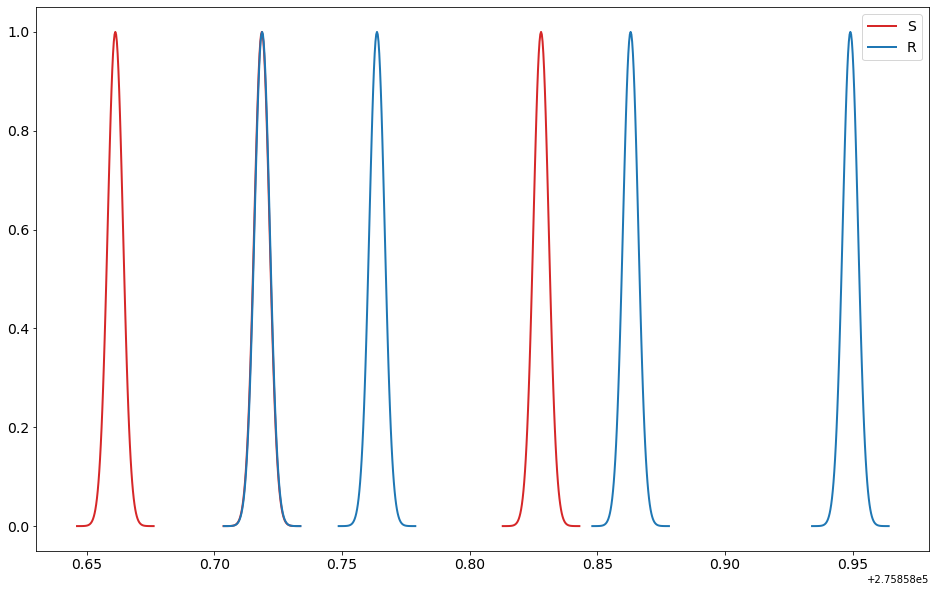

In [85]:
colors = {'R': 'C0', 'Q': 'C1', 'P': 'C2', 'S': 'C3', 'T': 'C4', 'O': 'C5'}
markers = {'R': '-', 'Q': '--', 'P': '-.', 'S': '-', 'T': '--', 'O': '-.'}

fig, ax = plt.subplots(figsize = (16,10))
for n, f in zip(close[0], close[1]):
    print(f"{n:<19} -> {f:.2f} GHz")
    ax.plot(*gaussian_profile(f), color = colors[n[0]], lw = 2, ls = markers[n[0]], label = n[0])
legend_without_duplicate_labels(ax, fontsize = 14)

set_fontsize(ax, 14)

In [86]:
gs, es, f = centrex.transitions.find_transition('R2', 7/2, 4, return_states = 'True')

In [87]:
centrex.couplings.matrix_elements.calculate_ED_ME_mixed_state(gs, es)

0j